In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<h2>Hypothesis Test Example</h2>

10% of the population is made up of lefties. However, after taking a random sample of 500 UC Berkeley students, we discover that 14% of them were left-handed. Now, we suspect that students at UC Berkeley are more likely to be left-handed than the rest of the population. How can we test this? With a hypothesis test!

<h3>Hypotheses</h3>

Null: 10% of UC Berkeley students are left-handed, just as the rest of the population is. Any difference is due to random chance.

Alternative: UC Berkeley students are more likely to be left-handed than the rest of the population.

In [2]:
def sample_proportions(sample_size, model_props):
    """Returns an array in which each item corresponds to the proportion of times that corresponding item was 
    sampled from 'model_props' in 'sample_size' draws"""
    return np.random.multinomial(sample_size, model_props)/sample_size

<h3>Choosing a Test Statistic</h3>

What would be a good choice? You can choose multiple answers!

a) Absolute difference of the proportion of UC Berkeley students who are left-handed and 0.10

b) Proportion of UC Berkeley students who are left-handed - 0.10

c) Proportion of UC Berkeley students who are left-handed

<h3>Observed Value of the Test Statistic</h3>

In [3]:
obs_val = 0.14

<h3>Simulating Values of the Test Statistic Under the Null</h3>

(array([ 12.,  62., 150., 200., 241., 206.,  85.,  34.,   7.,   3.]),
 array([0.064 , 0.0724, 0.0808, 0.0892, 0.0976, 0.106 , 0.1144, 0.1228,
        0.1312, 0.1396, 0.148 ]),
 <a list of 10 Patch objects>)

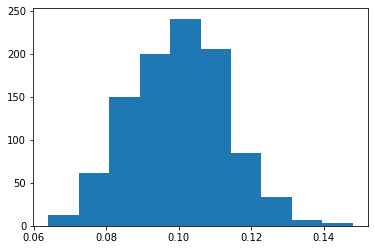

In [4]:
model_proportions = [0.10, 0.90]
simulated_prop_lefties = []

#simulate calculating 1000 values of the test statistic under the model of the null hypothesis:
for i in range(1000):
    sim_stat = sample_proportions(500, model_proportions)
    sim_left_prop = sim_stat[0]
    simulated_prop_lefties.append(sim_left_prop)    

simulated_prop_lefties = np.array(simulated_prop_lefties)

#plot a histogram of our distribution under the null:
plt.hist(simulated_prop_lefties)

<h3>Calculating a 95% Confidence Interval</h3>

In [5]:
left_end = np.percentile(simulated_prop_lefties, 2.5)
right_end = np.percentile(simulated_prop_lefties, 97.5)
ci = [left_end, right_end]
ci

[0.076, 0.12604999999999994]

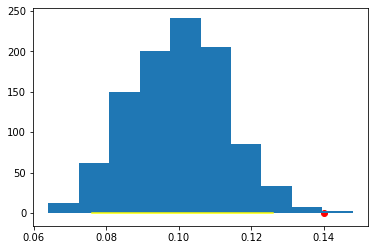

In [6]:
#create a visualization showing your null distribution, 95% CI, and observed value:
plt.hist(simulated_prop_lefties)
plt.plot(ci, [0,0], color = 'yellow')
plt.scatter(obs_val, 0, color = 'red')

<h3>Calculating P-Value</h3>

In [7]:
p_value = sum(simulated_prop_lefties >= obs_val)/len(simulated_prop_lefties)
p_value

0.003